# Electricity generation in top 1000 cities, focusing on renewable energy

#### Team Members: Luis Diaz, Daniel Alemu
#### PID: A14029385, A13874961

### 2) Questions, why it is important:

1) In our project we want to see how the top 1000 cities in the US generate their electricity and whether it is from a renewable energy source or not. We want to see if the United States is doing enough to try and convert to more renewable energy sources by looking at the current state of renewable and non-renewable energy sources for various cities and then look at current and future energy projects around these cities to see if they are converting to renewable sources. We will check to see this by seeing how much of their total energy is produced by renewables and if not, how far they are from 100%. We then want to see if coastal cities are doing the most to convert to renewables due to rising sea levels affecting those communities. We plan to see higher renewable energy sources around coastal cities. This is a very important topic, because now humans have been developing new ways to reduce our emissions and reduce the effects of climate change to preserve our planet and lower our environmental impact.

2) The business applications of our analysis can be, that businesses can see which cities need more renewable energy sources and try to build them. The type of energy source can also affect businesses when they are deciding their headquarters and buildings and want to reduce their environmental impact. The intended audience of our analysis is lawmakers who could use this information in doing things like deciding funding to build more clean energy sources. It could also be activists and concerned citizens trying to learn more about their communities and what their community is doing to combat the effects of climate change. 


### 3) Background and Literature

https://www.energymanagertoday.com/us-cities-renewable-energy-0180660/

https://www.yaleclimateconnections.org/2019/04/u-s-cities-pledge-to-switch-to-renewables/

https://www.energy.gov/maps/renewable-energy-production-state

http://css.umich.edu/factsheets/us-renewable-energy-factsheet

More and more cities in the United States are committing themselves to goals for renewable energy levels they want to achieve. By doing our analysis we want to see how far off some of these cities are from goals, such as 100% renewable energy commitment. We expect to find that many cities committed to their renewable energy deadlines have already started working on renewable energy sources and have various projects they are working on. The level of commitment might vary by region and we expect the coastal cities committed more to their renewable energy goals as they are mostly affected by the threat of rising sea levels.

After looking for new references, we saw that it was impractical to measure the power plants by how close they are to the cities and we changed our plans. We decided to look at the utilities comapnies instead and associated where utilities companies draw their power from and what type of energy it is. We also got the new idea to build a Linear Regression, SVM, and Random Forest to predict the renewable energy level of cities. Some of the variables we can use are the population of the cities, and the latitude/longitude of the cities. We can use this to see how far along cities are in achieving 100% renewable energy.


### 4) Libraries/ArcGIS modules

In our project proposal we imported Pandas, Numpy, GeoPandas and GIS to read in our data and for our initial geospatial analysis on the data. As we continued working we imported a few specific things that weren't on our project proposal like Point from shapely for our data cleaning. I imported dissolve boundaries to turn zip codes into areas that utilities serve. We also imported sklearn and a lot of other functions like OneHotEncoder, Pipeline, and preprocessing to make our LinearRegression, SVM, and RandomForests later in the analysis. We imported some graphing tools like matplotlib, seaborn, and  mpl_toolkits to make graphs and charts for our data.

In [49]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from arcgis import *
import arcgis
from arcgis import GIS
from IPython.display import display
import matplotlib.pyplot as plt
import sklearn
from arcgis.features.manage_data import dissolve_boundaries
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import preprocessing
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [3]:
gis = GIS(username='dalemu_UCSDOnline')

Enter password: ········


### 5) Data Sources

1) Data on rising sea levels in US coastal cities: http://usgs.maps.arcgis.com/apps/Cascade/index.html?appid=668f6dc7014d45228c993302d3eab2f5

2) Data on the top 1000 US cities by population: https://public.opendatasoft.com/explore/dataset/1000-largest-us-cities-by-population-with-geographic-coordinates/table/?sort=-rank

3) Maps on various energy sources in the US: https://www.eia.gov/electricity/data/eia860m/

4) Solar Projects in the US: 
https://www.energy.gov/eere/solar/downloads/solar-projects-download

5) zip code data:
https://www2.census.gov/geo/tiger/TIGER2018/ZCTA5/

6) Electric utilities and ids:https://openei.org/doe-opendata/dataset/011e736e-0aa0-4c73-9dd6-e943e3443d9c


Our data sources evolved from our project proposal as we added new sources of data. We ended up not using the solar projects datasets we wrote in our proposal because we did not find a good use for the data. The sea levels datset gave us the coastal cities we can use to analyze. Besides the power plants and cites data from our proposal, we imported zip code data from the government census website. It was difficult finding data for all the zip codes in the United States and the data we imported only has 33,144 entries out of the 42,000 zip codes actually in the US. Even though the data is missing a lot of zip codes we decided to work with it because a lot of the data lost was in remote regions and it had the geometries we were looking for. We also imported the datasets iou (investor owned utilities) and noniou (investor owned utilities) to tell us what utilities serve various zip codes in the US. These utilities associated zip codes to utilities the utilities ids but it also only had 39921 unique zip codes. Our utilities data also only had 1794 unique utility ids while our power plant data has 4398 unique ids. Because of this we are also missing data on some utilities and the zip codes they serve but it is fine because it has a majority of the data we needed. Many of the data we have we turned into feature layers in arcgis and published.

In [4]:
sea_levels = pd.read_csv('techrpt083.csv', header = 15)
sea_levels.head()

,Site,PSMSL ID,Latitude,Longitude,Scenario,Background RSL rate (mm/yr),RSL in 2000 (cm),RSL in 2010 (cm),RSL in 2020 (cm),RSL in 2030 (cm),RSL in 2040 (cm),RSL in 2050 (cm),RSL in 2060 (cm),RSL in 2070 (cm),RSL in 2080 (cm),RSL in 2090 (cm),RSL in 2100 (cm),RSL in 2120 (cm),RSL in 2150 (cm),RSL in 2200 (cm)
0,GMSL,0,NaN,NaN,0.3 - MED,0.0,0,3,6,9,13,16,19,22,25,28,30,34.0,37.0,39.0
1,GMSL,0,NaN,NaN,0.3 - LOW,0.0,0,3,5,9,12,15,18,21,24,26,29,30.0,32.0,29.0
2,GMSL,0,NaN,NaN,0.3 - HIGH,0.0,0,3,6,10,13,17,20,23,26,28,31,42.0,51.0,67.0
3,GMSL,0,NaN,NaN,0.5 - MED,0.0,0,4,8,13,18,24,29,35,40,45,50,60.0,73.0,95.0
4,GMSL,0,NaN,NaN,0.5 - LOW,0.0,0,3,7,12,16,22,27,33,38,44,49,56.0,66.0,77.0


In [5]:
zip_codes = gpd.read_file('tl_2018_us_zcta510.shp')
zip_codes.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.708733 41.327326, -83.708147 41...."
1,43452,43452,B5,G6350,S,121501421,13700682,+41.5157923,-082.9809454,"POLYGON ((-83.086978 41.537796, -83.0825629999..."
2,43456,43456,B5,G6350,S,9389361,999166,+41.6468445,-082.8226641,"(POLYGON ((-82.835577 41.710823, -82.83515 41...."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650299999999 41.253708, -83.48..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.222292 41.531025, -83.2222819999..."


In [6]:
#shp_file = gis.content.add({'title':'ZipCodesUSA'}, data = 'tl_2018_us_zcta510.zip')
#item = shp_file.publish()
#item.id
item_id = '49fc56d83ddb45159e9fd9e3fe22f48f'

In [7]:
zip_code_lyr = gis.content.search(item_id)[0]
zip_code_lyr

<Item title:"ZipCodesUSA" type:Feature Layer Collection owner:lmd003_UCSDOnline6>

In [8]:
power_plants = gpd.read_file('PowerPlants_US_201901.shp')
power_plants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,Geo_MW,Bat_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,Alabama,35476,19001 Lock 17 Road,...,None,None,None,Hydroelectric = 53 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201901,33.458665,-87.356823,POINT (-87.35682299999996 33.45866500000005)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,Alabama,36512,North Highway 43,...,None,None,None,"Coal = 1118.5 MW, Natural Gas = 1217.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201901,31.006900,-88.010300,POINT (-88.01029999999997 31.00690000000003)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,Alabama,36092,750 Bouldin Dam Road,...,None,None,None,Hydroelectric = 224.1 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201901,32.583889,-86.283056,POINT (-86.28305599999999 32.58388900000006)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,Alabama,35903,1000 Goodyear Ave,...,None,None,None,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201901,34.012800,-85.970800,POINT (-85.97079999999994 34.01280000000003)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,Alabama,35580,460 Gorgas Road,...,None,None,None,Coal = 1062.7 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201901,33.644344,-87.196486,POINT (-87.19648599999994 33.64434400000005)


In [9]:
#shp_file = gis.content.add({'title':'US Power Plants'}, data = 'PowerPlants_US_EIA.zip')
#item = shp_file.publish()
#item.id
item_id = '805431fc9ad14434aca0e48f529daefa'

<Item title:"US Power Plants" type:Feature Layer Collection owner:lmd003_UCSDOnline6>
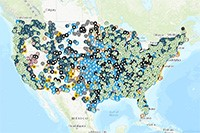

In [10]:
power_plants_lyr = gis.content.search(item_id)[0]
power_plants_lyr

In [11]:
solar_projects = pd.read_excel('solar_projects_01_24_2019.xlsx')
solar_projects.head()

,Project_Title,Awardees,CID,SUBPROGRAM,SUBPROGRAM_NODE,Award_Type,FOA_NAME,FOA_Acronym,Status,Award_Start_Date,...,Total_Government_Share,Cost_Share,City,State,Zip_Code,Node,Latitude,Longitude,Principal_Investigator,Project_Description
0,Project Silicon: Reclaiming U.S. Silicon PV Le...,1366 Technologies,EE0005737,Technology to Market,node/928446,Funding Opportunity,Scaling Up Nascent PV AT Home,SunPath,Inactive,2012-09-01 00:00:00,...,6999959,20999877,Lexington,MA,02420-0001,node/791051,42.460908,-71.222083,Adam Lorenz,A $7 million federal award complemented $21 m...
1,Enabling Automation for <$0.10/W High-Efficien...,1366 Technologies,EE0006808,Technology to Market,node/928446,Funding Opportunity,Solar Manufacturing Technology 2,SolarMat 2,Inactive,2015-04-01 00:00:00,...,1000000,1000000,Lexington,MA,02420-0001,node/973806,42.460908,-71.222083,Adam Lorenz,1366 Technologies is demonstrating the potenti...
2,The Self Aligned Cell: Scaling Up Manufacture ...,1366 Technologies,NREL/SR-5200-49934,Technology to Market,node/928446,Funding Opportunity,Incubator 2,Incubator 2,Inactive,NaN,...,3000000,NaN,Lexington,MA,02420-0001,node/791011,42.460908,-71.222083,Andrew Gabor,"Under the contract, 1366 Technologies develope..."
3,Kerfless Silicon Precursor Wafer Formed by Rap...,1366 Technologies,NaN,Technology to Market,node/928446,Funding Opportunity,NREL ARRA PV Technology Pre-Incubator Awards,Pre-Incubator,Inactive,2009-10-01 00:00:00,...,500000,NaN,Lexington,MA,02420-0001,node/791011,42.460908,-71.222083,Adam Lorenz,Standard wafer manufacturing involves a multis...
4,Next-Generation Solar Collectors for CSP,3M Company,EE0005795,Concentrating Solar Power,node/790241,Funding Opportunity,SunShot Concentrating Solar Power R&D,CSP SunShot R&D,Inactive,2012-09-01 00:00:00,...,4126217,4886359,St. Paul,MN,55144-1000,node/790606,44.950801,-92.996073,Attila Molnar,"3M Company, under the 2012 SunShot Concentrati..."


In [12]:
cities = gpd.read_file('1000-largest-us-cities-by-population-with-geographic-coordinates.shp')
cities.head()

,city,rank,state,growth_from,population,geometry
0,Enid,727.0,Oklahoma,8.1,50725.0,POINT (-97.8783911 36.3955891)
1,San Jose,10.0,California,10.5,998537.0,POINT (-121.8863286 37.3382082)
2,Round Rock,251.0,Texas,81.0,109821.0,POINT (-97.67889599999999 30.5082551)
3,Maple Grove,531.0,Minnesota,27.3,65415.0,POINT (-93.4557877 45.0724642)
4,Norman,225.0,Oklahoma,22.0,118197.0,POINT (-97.4394777 35.2225668)


In [13]:
iou = pd.read_csv('iouzipcodes2015.csv')
iou.head()

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.096925,0.088462,0.101581
1,35218,195,Alabama Power Co,AL,Bundled,Investor Owned,0.111275,0.061426,0.122035
2,35219,195,Alabama Power Co,AL,Bundled,Investor Owned,0.111275,0.061426,0.122035
3,35214,195,Alabama Power Co,AL,Bundled,Investor Owned,0.111275,0.061426,0.122035
4,35215,195,Alabama Power Co,AL,Bundled,Investor Owned,0.111275,0.061426,0.122035


In [14]:
noniou = pd.read_csv('noniouzipcodes2015.csv')
noniou.head()

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,38858,55,City of Aberdeen - (MS),MS,Bundled,Municipal,0.108123,0.051382,0.110196
1,39730,55,City of Aberdeen - (MS),MS,Bundled,Municipal,0.108123,0.051382,0.110196
2,70510,59,City of Abbeville - (LA),LA,Bundled,Municipal,0.110181,0.086184,0.104306
3,21824,84,A & N Electric Coop,MD,Bundled,Cooperative,0.129740,0.000000,0.123743
4,21851,84,A & N Electric Coop,MD,Bundled,Cooperative,0.129740,0.000000,0.123743


### 6) Data Cleaning

We realized we had to clean some of our data after introspecting the data. We by making the sea levels dataset a geodataframe by giving it a geometry based on its latitude and longitude points (We ended up not needing to use the geometry of this dataset). Next we concatenated the two utility datasets (iou and noniou) into one dataset of all the utilities in the US. Once we had that, we merged our zip codes and utilities datasets to make one giant dataframe and we dropped any missing geometries that might have existed to the zip codes not existing in our zip codes data. We then turned it into a geodataframe and dropped unused columns. We then turned this geodatframe into a feature layer in GIS. After that we made a new feature layer on the dissolved areas that had the same ID. When we wrote the proposal we didn't expect we had to clean as much of the data that we did.

In [15]:
sea_levels['Coordinates'] = list(zip(sea_levels.Longitude, sea_levels.Latitude))
sea_levels['Coordinates'] = sea_levels['Coordinates'].apply(Point)
sea_levels = gpd.GeoDataFrame(sea_levels, geometry='Coordinates').reset_index()
sea_levels = sea_levels.dropna(subset = ['Latitude'])
sea_levels.head()

,index,Site,PSMSL ID,Latitude,Longitude,Scenario,Background RSL rate (mm/yr),RSL in 2000 (cm),RSL in 2010 (cm),RSL in 2020 (cm),...,RSL in 2050 (cm),RSL in 2060 (cm),RSL in 2070 (cm),RSL in 2080 (cm),RSL in 2090 (cm),RSL in 2100 (cm),RSL in 2120 (cm),RSL in 2150 (cm),RSL in 2200 (cm),Coordinates
18,18,SAN FRANCISCO,10,37.81,-122.47,0.3 - MED,-0.07,0,3,6,...,17,21,25,28,31,34,40.0,47.0,53.0,POINT (-122.47 37.81)
19,19,SAN FRANCISCO,10,37.81,-122.47,0.3 - LOW,-0.16,0,1,3,...,10,13,15,17,19,19,23.0,25.0,17.0,POINT (-122.47 37.81)
20,20,SAN FRANCISCO,10,37.81,-122.47,0.3 - HIGH,0.02,0,4,8,...,23,28,33,38,43,49,55.0,65.0,83.0,POINT (-122.47 37.81)
21,21,SAN FRANCISCO,10,37.81,-122.47,0.5 - MED,-0.07,0,3,8,...,22,28,33,38,43,48,56.0,70.0,92.0,POINT (-122.47 37.81)
22,22,SAN FRANCISCO,10,37.81,-122.47,0.5 - LOW,-0.16,0,2,5,...,17,21,26,31,36,38,46.0,52.0,57.0,POINT (-122.47 37.81)


In [16]:
utilities = pd.concat([iou, noniou], ignore_index= True)
utilities.head()

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.096925,0.088462,0.101581
1,35218,195,Alabama Power Co,AL,Bundled,Investor Owned,0.111275,0.061426,0.122035
2,35219,195,Alabama Power Co,AL,Bundled,Investor Owned,0.111275,0.061426,0.122035
3,35214,195,Alabama Power Co,AL,Bundled,Investor Owned,0.111275,0.061426,0.122035
4,35215,195,Alabama Power Co,AL,Bundled,Investor Owned,0.111275,0.061426,0.122035


In [17]:
zip_codes['ZCTA5CE10'] = pd.to_numeric(zip_codes['ZCTA5CE10'])
zips_ids = utilities.merge(zip_codes, left_on = 'zip',right_on = 'ZCTA5CE10', how = 'left').dropna(subset = ['geometry']).reset_index()
zips_ids = gpd.GeoDataFrame(zips_ids, geometry = 'geometry')
zips_ids = zips_ids.drop(['comm_rate', 'ind_rate', 'res_rate', 'ZCTA5CE10',
       'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10'], axis = 1)
zips_ids.head()

,index,zip,eiaid,utility_name,state,service_type,ownership,geometry
0,0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,"POLYGON ((-113.085228 32.200353, -113.083393 3..."
1,1,35218,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.911491 33.50122, -86.91058699999..."
2,3,35214,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.942674 33.570016, -86.941514 33...."
3,4,35215,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.771626 33.643336, -86.770518 33...."
4,5,35216,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.813869 33.444376, -86.813705 33...."


In [18]:
# Saving our geopandas dataframe as a shapefile
#zips_ids.to_file('zips_ids.shp')

In [19]:
#shp_file = gis.content.add({'title':'Utilities'}, data = 'zips_ids.zip')
#item = shp_file.publish()
#item.id
item_id = '036c6a0edd3f436488d062d0caffb93f'

In [20]:
id_lyr = gis.content.search(item_id)[0]
id_lyr

<Item title:"Utilities" type:Feature Layer Collection owner:lmd003_UCSDOnline6>

In [21]:
#dissolved = dissolve_boundaries(id_lyr, dissolve_fields = ["eiaid"], output_name='DissolvedIDLayers ld')
item_id = '467ba22dce2b45c680bf2d2900a11484'

<Item title:"DissolvedIDLayers ld" type:Feature Layer Collection owner:lmd003_UCSDOnline6>
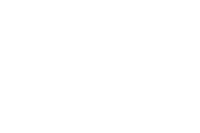

In [22]:
dissolved_lyr = gis.content.search(item_id)[0]
dissolved_lyr

In [23]:
#shp_file = gis.content.add({'title':'US Top 1000 cities'}, data = '1000-largest-us-cities-by-population-with-geographic-coordinates.zip')
#item = shp_file.publish()
#item.id
item_id = '6eb17a61fdb24ec9b83deeff520da19a'

In [24]:
cities_lyr = gis.content.search(item_id)[0]
cities_lyr

<Item title:"US Top 1000 cities" type:Feature Layer Collection owner:lmd003_UCSDOnline6>

### 7) Descriptive Statistics

Looking for spatial autocorrelation isn't very relevant to the theme of our project. In our project spatial autocorrelation didn't matter as we were trying to build areas for the utilities and see where the utilities got there power from.

In [25]:
print('Total Energy from all our power plants in the US:', power_plants['Total_MW'].sum(), 'MW')
print('Mean Energy from all our power plants in the US:', power_plants['Total_MW'].mean(), 'MW')

Total Energy from all our power plants in the US: 1104061.3 MW
Mean Energy from all our power plants in the US: 120.15032103602134 MW


In [26]:
print('We have', len(power_plants), 'power plants in our data')

We have 9189 power plants in our data


In [27]:
renewable_src = ['biomass', 'solar','wind', 'geothermal', 'hydroelectric', 'pumped storage']
non_renewable_src = ['natural gas', 'coal', 'nuclear', 'petroleum', 'other','batteries']
lst = [1 if i in renewable_src else 0 for i in power_plants['PrimSource']]
print('We considered', pd.Series(lst).sum(), 'power plants as being renewable') 

We considered 6066 power plants as being renewable


In [28]:
print('Utilities has ', utilities.eiaid.nunique(), 'unique ids')
print('Power Plants has', power_plants.Utility_ID.nunique(), 'unique ids')

Utilities has  1794 unique ids
Power Plants has 4398 unique ids


### 8) Analysis

#### 500 word reflections
We first started by defining our renewable and nonrenewable power plants. We labeled ['biomass', 'solar','wind', 'geothermal', 'hydroelectric', 'pumped storage'] as renewable and ['natural gas', 'coal', 'nuclear', 'petroleum', 'other','batteries'] as nonrenewable resources. We made an assumption and labelled power plants as renewable or not by the primary source of energy they produced and didn't seperate all the different types of energy that plants could produce. After that we grouped our power plants based on the utility they serve and whether they are renewable and summed up their energy production. This became a dataframe we called energy. After that we added a column calld 'ratio' to energy that is the renewable energy over the total energy. Then we reset the index of this dataset and merge it based on their utility ids with the zips_and_ids dataset we created during our data cleaning and call this merged dataset big_group. Now that we have this dataset we set its crs to that of our cities dataset ({'init': 'epsg:4326'}). We then make a spatial join between our big group and cities to find which utility area cities fall under, and call this new dataset big_one. We then add the columns 'x' and 'y' that are its longitude and latitude respectively by taking it from its geometry. This will be used for our linear regression. Now that we have this big group dataset we can find the mean renewable energy and we find it to be about 32%. We then seperate cities as coastal if they were in the sea levels dataset. We take their mean and find it to be about 23%.

The classifiers used were the support vector machine regressor, random forest regressor, and a basic linear regressor. First we wanted to see if a city's characteristics would predict if the city used renewable energy, using predictors of city population, city growth, and rank of the city. That however didn't see to be the case with our data, the linear regression classifier fitted with this model gave a score of -596.6562267146905. Then we decided to use a cities location, the predictors were longitude, latitude, state to city's left, and state to city's right. This model worked much better with a score of 0.5003432186922063. Using these predictors we trained the support vector machine model and the random forest regressor. The random forest regressor didn't do very well and only scored 0.4976969571021066. But the support vector machine model had the best score of all the model with 0.6258948814300161.

In [29]:
renewable_src = ['biomass', 'solar','wind', 'geothermal', 'hydroelectric', 'pumped storage']
non_renewable_src = ['natural gas', 'coal', 'nuclear', 'petroleum', 'other','batteries']
power_plants_copy = power_plants.copy()
lst = [1 if i in renewable_src else 0 for i in power_plants['PrimSource']]
power_plants_copy['Renew'] = pd.Series(lst)
energy = pd.DataFrame(power_plants_copy.groupby(["Utility_ID", "Renew"])['Total_MW'].sum()).unstack().fillna(0)
energy = energy['Total_MW']
energy.head()

Renew,0,1
Utility_ID,,
7,62.0,0.0
8,7.4,0.0
21,320.0,0.0
25,104.5,0.0
34,0.0,3.6


In [30]:
energy["clean_energy_ratio"] = energy.iloc[:,1]/(energy.iloc[:,0]+energy.iloc[:,1])#.reset_index().columns
cleaned = energy.reset_index()
big_group = pd.merge(zips_ids, cleaned, left_on="eiaid", right_on="Utility_ID")
big_group.head()

,index,zip,eiaid,utility_name,state,service_type,ownership,geometry,Utility_ID,0,1,clean_energy_ratio
0,1,35218,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.911491 33.50122, -86.91058699999...",195,11592.4,1712.2,0.128692
1,3,35214,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.942674 33.570016, -86.941514 33....",195,11592.4,1712.2,0.128692
2,4,35215,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.771626 33.643336, -86.770518 33....",195,11592.4,1712.2,0.128692
3,5,35216,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.813869 33.444376, -86.813705 33....",195,11592.4,1712.2,0.128692
4,6,35217,195,Alabama Power Co,AL,Bundled,Investor Owned,"POLYGON ((-86.80130199999999 33.622442, -86.80...",195,11592.4,1712.2,0.128692


In [31]:
big_group.crs = {'init': 'epsg:4326'}
big_one = gpd.sjoin(cities, big_group, how="inner", op='within')
big_one.head()

,city,rank,state_left,growth_from,population,geometry,index_right,index,zip,eiaid,utility_name,state_right,service_type,ownership,Utility_ID,0,1,clean_energy_ratio
0,Enid,727.0,Oklahoma,8.1,50725.0,POINT (-97.8783911 36.3955891),16852,28530,73701,14063,Oklahoma Gas & Electric Co,OK,Bundled,Investor Owned,14063,6892.7,458.2,0.062333
1,San Jose,10.0,California,10.5,998537.0,POINT (-121.8863286 37.3382082),17824,29796,95112,14328,Pacific Gas & Electric Co,CA,Bundled,Investor Owned,14328,3615.8,4043.6,0.527926
1,San Jose,10.0,California,10.5,998537.0,POINT (-121.8863286 37.3382082),18719,30936,95112,14328,Pacific Gas & Electric Co,CA,Delivery,Investor Owned,14328,3615.8,4043.6,0.527926
3,Maple Grove,531.0,Minnesota,27.3,65415.0,POINT (-93.4557877 45.0724642),15600,26416,55311,13781,Northern States Power Co - Minnesota,MN,Bundled,Investor Owned,13781,7438.4,1076.4,0.126415
4,Norman,225.0,Oklahoma,22.0,118197.0,POINT (-97.4394777 35.2225668),16957,28652,73069,14063,Oklahoma Gas & Electric Co,OK,Bundled,Investor Owned,14063,6892.7,458.2,0.062333


In [32]:
big_one["x"] = big_one["geometry"].x#.coords
big_one["y"] = big_one["geometry"].y
big_one.head()

,city,rank,state_left,growth_from,population,geometry,index_right,index,zip,eiaid,utility_name,state_right,service_type,ownership,Utility_ID,0,1,clean_energy_ratio,x,y
0,Enid,727.0,Oklahoma,8.1,50725.0,POINT (-97.8783911 36.3955891),16852,28530,73701,14063,Oklahoma Gas & Electric Co,OK,Bundled,Investor Owned,14063,6892.7,458.2,0.062333,-97.878391,36.395589
1,San Jose,10.0,California,10.5,998537.0,POINT (-121.8863286 37.3382082),17824,29796,95112,14328,Pacific Gas & Electric Co,CA,Bundled,Investor Owned,14328,3615.8,4043.6,0.527926,-121.886329,37.338208
1,San Jose,10.0,California,10.5,998537.0,POINT (-121.8863286 37.3382082),18719,30936,95112,14328,Pacific Gas & Electric Co,CA,Delivery,Investor Owned,14328,3615.8,4043.6,0.527926,-121.886329,37.338208
3,Maple Grove,531.0,Minnesota,27.3,65415.0,POINT (-93.4557877 45.0724642),15600,26416,55311,13781,Northern States Power Co - Minnesota,MN,Bundled,Investor Owned,13781,7438.4,1076.4,0.126415,-93.455788,45.072464
4,Norman,225.0,Oklahoma,22.0,118197.0,POINT (-97.4394777 35.2225668),16957,28652,73069,14063,Oklahoma Gas & Electric Co,OK,Bundled,Investor Owned,14063,6892.7,458.2,0.062333,-97.439478,35.222567


In [33]:
renew_mean = big_one['clean_energy_ratio'].mean()
renew_mean

0.3248651061841308

In [34]:
coastal = big_one[pd.Series(big_one.city.str.lower()).isin(list(pd.Series(sea_levels.Site.unique()).str.lower()))]
coastal.head()

,city,rank,state_left,growth_from,population,geometry,index_right,index,zip,eiaid,utility_name,state_right,service_type,ownership,Utility_ID,0,1,clean_energy_ratio,x,y
85,Richmond,99.0,Virginia,8.2,214114.0,POINT (-77.43604809999999 37.5407246),26398,45435,23219,19876,Virginia Electric & Power Co,VA,Bundled,Investor Owned,19876,19859.3,3610.2,0.153825,-77.436048,37.540725
85,Richmond,99.0,Virginia,8.2,214114.0,POINT (-77.43604809999999 37.5407246),26949,46184,23219,19876,Virginia Electric & Power Co,VA,Delivery,Investor Owned,19876,19859.3,3610.2,0.153825,-77.436048,37.540725
99,Honolulu,54.0,Hawaii,-6.2,347884.0,POINT (-157.8583333 21.3069444),26060,45037,96813,19547,Hawaiian Electric Co Inc,HI,Bundled,Investor Owned,19547,1039.7,173.4,0.142940,-157.858333,21.306944
133,San Diego,8.0,California,10.5,1355896.0,POINT (-117.1610838 32.715738),23137,40772,92101,16609,San Diego Gas & Electric Co,CA,Bundled,Investor Owned,16609,742.2,3.7,0.004960,-117.161084,32.715738
133,San Diego,8.0,California,10.5,1355896.0,POINT (-117.1610838 32.715738),23269,40982,92101,16609,San Diego Gas & Electric Co,CA,Delivery,Investor Owned,16609,742.2,3.7,0.004960,-117.161084,32.715738


In [35]:
coastal_renew_mean = coastal['clean_energy_ratio'].mean()
coastal_renew_mean

0.23547995418988124

In [36]:
reg_data = big_one.dropna()[["city", "population", "growth_from", "rank", "clean_energy_ratio", "x", "y"]]

reg_data["population"] = pd.to_numeric(reg_data["population"])
reg_data["growth_from"] = pd.to_numeric(reg_data["growth_from"])
reg_data["rank"] = pd.to_numeric(reg_data["rank"])

X_train, X_test, y_train, y_test = train_test_split(reg_data.dropna().drop("clean_energy_ratio", axis=1), reg_data.dropna()["clean_energy_ratio"], test_size=.33)
#ct = ([["city"], OneHotEncoder, "encoder"])
#Pipeline = (ct, LinearRegression())
lr = LinearRegression()

#Model for Victim Number with ZIP and SEVERITY as the x
#X_train
lr.fit(X_train.drop(["city", "x", "y"], axis=1), y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

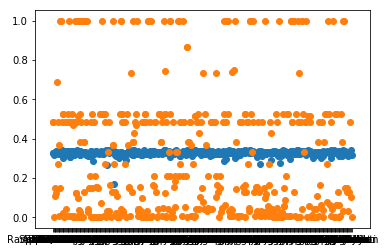

In [37]:
ax = plt.scatter(X_test["city"], lr.predict(X_test.drop(["city", "x", "y"], axis=1)).T)
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.scatter(X_test["city"], y_test)#, ax=ax)


plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


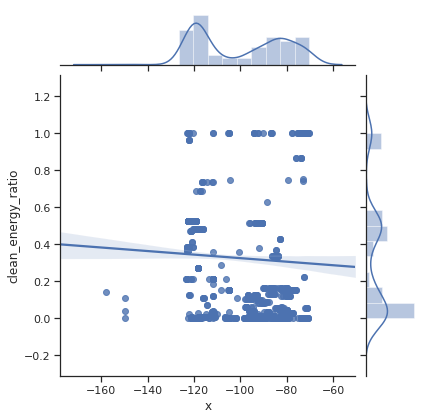

In [38]:
sns.set(style="ticks", color_codes=True)
g = sns.JointGrid(x="x", y="clean_energy_ratio", data=reg_data)
g = g.plot(sns.regplot, sns.distplot)

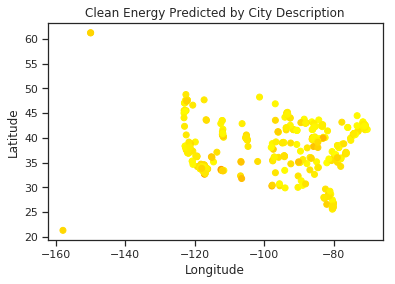

In [39]:
ax = plt.scatter(X_test["x"], X_test["y"], c=lr.predict(X_test.drop(["city", "x", "y"], axis=1)).T, cmap=plt.cm.autumn)
plt.title("Clean Energy Predicted by City Description")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

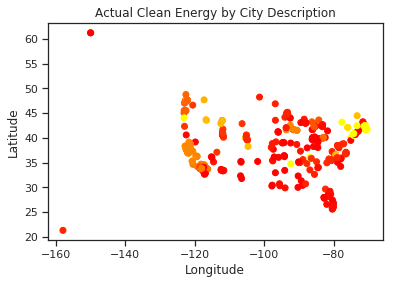

In [40]:
plt.scatter(X_test["x"], X_test["y"], c=y_test, cmap=plt.cm.autumn)#, ax=ax)
plt.title("Actual Clean Energy by City Description")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [41]:
#Best possible score is 1.0, always predict expected score would be 0.0
r2_score(lr.predict(X_test.drop(["city","x", "y"], axis=1)), y_test)

-596.6562267146905

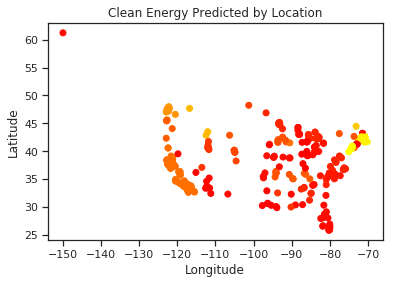

In [42]:
big_one["x"] = big_one["geometry"].x#.coords
big_one["y"] = big_one["geometry"].y
reg_data = big_one.dropna()[["city", "x", "y", "state_left", "state_right", "clean_energy_ratio"]]

reg_data["x"] = pd.to_numeric(reg_data["x"])
reg_data["y"] = pd.to_numeric(reg_data["y"])

X_train, X_test, y_train, y_test = train_test_split(reg_data.dropna().drop("clean_energy_ratio", axis=1), reg_data.dropna()["clean_energy_ratio"], test_size=.33)
ct = ColumnTransformer([("one-hot-encode", OneHotEncoder(handle_unknown="ignore"), ["state_left", "state_right"])])
pl = Pipeline([('column-transform', ct), ('reg', LinearRegression())])
#ct = LinearRegression()

#Model for Victim Number with ZIP and SEVERITY as the x
pl.fit(X_train.drop("city", axis=1), y_train) 

ax = plt.scatter(X_test["x"], X_test["y"], c=pl.predict(X_test.drop("city", axis=1)).T, cmap=plt.cm.autumn)
plt.title("Clean Energy Predicted by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

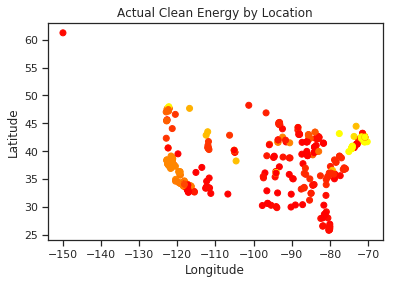

In [43]:
plt.scatter(X_test["x"], X_test["y"], c=y_test, cmap=plt.cm.autumn)#, ax=ax)
plt.title("Actual Clean Energy by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [44]:
r2_score(pl.predict(X_test.drop("city", axis=1)), y_test)

0.5003432186922063

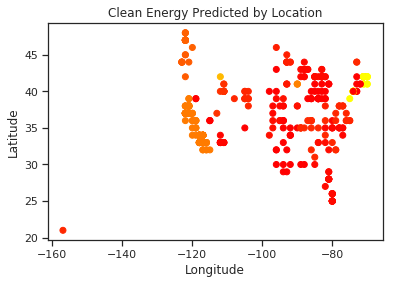

In [47]:
big_one["x"] = big_one["geometry"].x#.coords
big_one["y"] = big_one["geometry"].y
reg_data = big_one.dropna()[["city", "x", "y", "state_left", "state_right", "clean_energy_ratio"]]

reg_data["x"] = pd.to_numeric(reg_data["x"]).astype(int)
reg_data["y"] = pd.to_numeric(reg_data["y"]).astype(int)
reg_data["clean_energy_ratio"] = (pd.to_numeric(reg_data["clean_energy_ratio"])*100).astype(int)

X_train, X_test, y_train, y_test = train_test_split(reg_data.dropna().drop("clean_energy_ratio", axis=1), reg_data.dropna()["clean_energy_ratio"], test_size=.33)
ct = ColumnTransformer([("one-hot-encode", OneHotEncoder(handle_unknown="ignore"), ["state_left", "state_right"])])

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = svm.SVR(gamma="scale")
clf = GridSearchCV(svr, parameters, cv=5)

pl = Pipeline([('column-transform', ct), ('svm',clf)]) #, ("no continous", preprocessing.LabelEncoder())
#ct = LinearRegression()

#Model for Victim Number with ZIP and SEVERITY as the x
pl.fit(X_train.drop("city", axis=1), y_train) 

ax = plt.scatter(X_test["x"], X_test["y"], c=pl.predict(X_test.drop("city", axis=1)).T, cmap=plt.cm.autumn)
plt.title("Clean Energy Predicted by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [48]:
#Support Vector Machine Classifier with 5-fold Cross Validation, Best param 'C':[1, 10]
pl.score(X_test.drop("city", axis=1), y_test)

0.6258948814300161

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

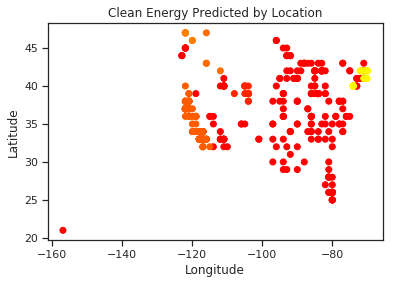

In [50]:
big_one["x"] = big_one["geometry"].x#.coords
big_one["y"] = big_one["geometry"].y
reg_data = big_one.dropna()[["city", "x", "y", "state_left", "state_right", "clean_energy_ratio"]]

reg_data["x"] = pd.to_numeric(reg_data["x"]).astype(int)
reg_data["y"] = pd.to_numeric(reg_data["y"]).astype(int)
reg_data["clean_energy_ratio"] = (pd.to_numeric(reg_data["clean_energy_ratio"])*100).astype(int)

X_train, X_test, y_train, y_test = train_test_split(reg_data.dropna().drop("clean_energy_ratio", axis=1), reg_data.dropna()["clean_energy_ratio"], test_size=.33)
ct = ColumnTransformer([("one-hot-encode", OneHotEncoder(handle_unknown="ignore"), ["state_left", "state_right"])])

parameters = {"max_depth": [1, 2, 3, 4, 5]}
svc = RandomForestRegressor()
clf = GridSearchCV(svc, parameters, cv=5)

pl = Pipeline([('column-transform', ct), ('svm',clf)])
#ct = LinearRegression()

#Model for Victim Number with ZIP and SEVERITY as the x
pl.fit(X_train.drop("city", axis=1), y_train) 

ax = plt.scatter(X_test["x"], X_test["y"], c=pl.predict(X_test.drop("city", axis=1)).T, cmap=plt.cm.autumn)
plt.title("Clean Energy Predicted by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [51]:
pl.score(X_test.drop("city", axis=1), y_test)

0.4976969571021066

### 9) Summary

#### Maps and 200 words

In [52]:
print( len(big_one[big_one.clean_energy_ratio > .25]), 'cities at over 25% renewable energy')
print( len(big_one[big_one.clean_energy_ratio > .5]), 'cities at over 50% renewable energy')
print( len(big_one[big_one.clean_energy_ratio > .75]), 'cities at over 75% renewable energy')


676 cities at over 25% renewable energy
354 cities at over 50% renewable energy
167 cities at over 75% renewable energy


In [207]:
sd = gis.map("San Diego")
sd.add_layer(zip_code_lyr)
sd

MapView(layout=Layout(height='400px', width='100%'))

In [208]:
m2 = gis.map('San Diego')
m2.add_layer(id_lyr,{'renderer':'ClassedColorRenderer','field_name':'eiaid','opacity':0.75})
m2

MapView(layout=Layout(height='400px', width='100%'))

In [209]:
m3 = gis.map('San Diego')
m3.add_layer(dissolved_lyr,{'renderer':'ClassedColorRenderer','field_name':'eiaid','opacity':0.5})
m3

MapView(layout=Layout(height='400px', width='100%'))

In [210]:
m4 = gis.map('San Diego')
m4.add_layer(power_plants_lyr,{'renderer':'ClassedColorRenderer','field_name':'Utility_ID','opacity':0.75, 'cmap': 'Grn'})
m4.add_layer(cities_lyr)
m4

MapView(layout=Layout(height='400px', width='100%'))

In [211]:
m5 = gis.map('San Diego')
m5.add_layer(dissolved_lyr,{'renderer':'ClassedColorRenderer','field_name':'eiaid','opacity':0.5})
m5.add_layer(power_plants_lyr,{'renderer':'ClassedColorRenderer','field_name':'Utility_ID','opacity':0.75, 'cmap': 'Grn'})
m5.add_layer(cities_lyr)
m5

MapView(layout=Layout(height='400px', width='100%'))

### 10) Discussion

1) Discuss your findings with respect to the literature sources in section 3. What do the results mean in the context of what is already known? What is new? Does it validate what was found in literature? How do your results improve our understanding of the problem? 

A lot of cities have a relatively high percentage of renewable sources of energy. Most major cities use about 50% of their energy from renewable sources. We do not have a historical data source that we studied but we do a google search and found that renewable energy sources with cities in California did increase from roughly 10 years ago. So now we understand the trend of most US cities, seems that regional/locational factors seem to influence the ratio of renewable energy in a city (From the regression).

2) Of particular importance is a discussion of any trade-offs and decision points that you had to consider. This may include a discussion of any performance issues, width of buffers you applied, projections you chose, spatial operations you used, map combination techniques, and other issues we discussed in class.

Some of the zipcode double counted utilities and our data is based on how much energy a power plant generated total. So if a power plant barely serves the zipcode of one cities then it will split the energy it provides to the city 50/50 which isn't accurate. But that's not really easily checked since the power of city gets depends on each resident not necessarily on the city its or the spatial analysis we did. Also we don't have accurate information between what energy a power plant produced and how much they bought from other utilities. Our data only has the total power each power plant to a US city. This lead to some inconsisities we found with some power plants, like SDGE (in our data it says .496% clean energy but it produced roughly 40% of its energy as renewable)

### 11) Conclusions and future work

#### At least 200 words

1) Did you manage to completely answer your initial research question? If not, what additional data and additional analysis steps can you think of? Can your approach be extended to other areas or topics, and use additional datasets? How do you expect the results to be used and by whom?


We didn't complete

# The mean of the cities clean energy ratio is 32%

### That's much higher than the 12.2 percentage of renewable sources in US cities in 2016.

### That's a much higher increase and shows a growth of solar projects.

### But also we treat each city equal in our mean analysis, which isn't realistic to the actual model we observed (some US cities use much more energy). So there's a Simpson's paradox, incorrect weights on the average.